In [2]:
from qiskit import Aer, QuantumCircuit, assemble, execute
from qiskit.visualization import plot_histogram

from qiskit.circuit.library import C3XGate

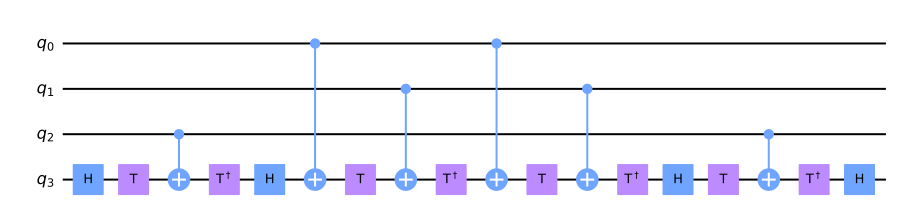

In [3]:
# rcccx の論文のFIG4の回路
rtof_qc = QuantumCircuit(4)
rtof_qc.h(3)
rtof_qc.t(3)
rtof_qc.cx(2,3)
rtof_qc.tdg(3)
rtof_qc.h(3)
rtof_qc.cx(0,3)
rtof_qc.t(3)
rtof_qc.cx(1,3)
rtof_qc.tdg(3)
rtof_qc.cx(0,3)
rtof_qc.t(3)
rtof_qc.cx(1,3)
rtof_qc.tdg(3)
rtof_qc.h(3)
rtof_qc.t(3)
rtof_qc.cx(2,3)
rtof_qc.tdg(3)
rtof_qc.h(3)

rtof_qc.draw()

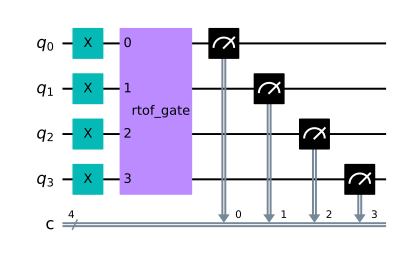

In [4]:
"""
rcccx
https://qiskit.org/documentation/locale/ja/api/qiskit.aqua.circuits.gates.rcccx.html

C3XGate
https://qiskit.org/documentation/stubs/qiskit.circuit.library.C3XGate.html
"""
qc = QuantumCircuit(4, 4)

for i in range(4):
    qc.x(i)

# qc.rcccx(0, 1, 2, 3)
rtof_gate = rtof_qc.to_gate(label="rtof_gate")
qc.append(rtof_gate, (0,1,2,3))

# c3xgate = C3XGate(label="C3XGate")
# qc.append(c3xgate, (0,1,2,3))

qc.measure([0,1,2,3], [0,1,2,3])

qc.draw()

In [5]:
# backend.runで実行
# rcccxだとエラー発生
# backend = Aer.get_backend("qasm_simulator")
backend = Aer.get_backend("aer_simulator")
shots = 1024
qobj = assemble(qc)
results = backend.run(qobj, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

Simulation failed and returned the following error message:
ERROR:  [Experiment 0] AerSimulator: circuit with instructions {"instructions": {gate, measure}, "gates": {x, circuit-0}} is not compatible with any of the automatic simulation methods


QiskitError: 'ERROR:  [Experiment 0] AerSimulator: circuit with instructions {"instructions": {gate, measure}, "gates": {x, circuit-0}} is not compatible with any of the automatic simulation methods ,  ERROR: AerSimulator: circuit with instructions {"instructions": {gate, measure}, "gates": {x, circuit-0}} is not compatible with any of the automatic simulation methods'

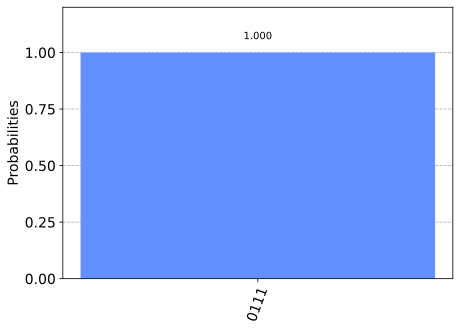

In [8]:
# executeで実行
backend = Aer.get_backend("aer_simulator")
shots = 1024
results = execute(qc, backend=backend, shots=shots).result()
count = results.get_counts()
plot_histogram(count)